# We will build different models on the Training Data and then go on to check the accuracy (or error) on the training and test data. The model which performs the best on the test data is an optimum model for us.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Read the dataset
df = pd.read_csv('daily-total-female-births.csv')

In [3]:
df.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
df.shape

(365, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [6]:
# As the Date column is in Object data type so we will convert it into Datetime data type
df = pd.read_csv('daily-total-female-births.csv',parse_dates=['Date'],index_col='Date')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Births  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


In [8]:
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


Now our data is ready for the analysis of Time Series Analysis

# Plot the Time Series to Understand the behaviour of the data

In [9]:
from pylab import rcParams

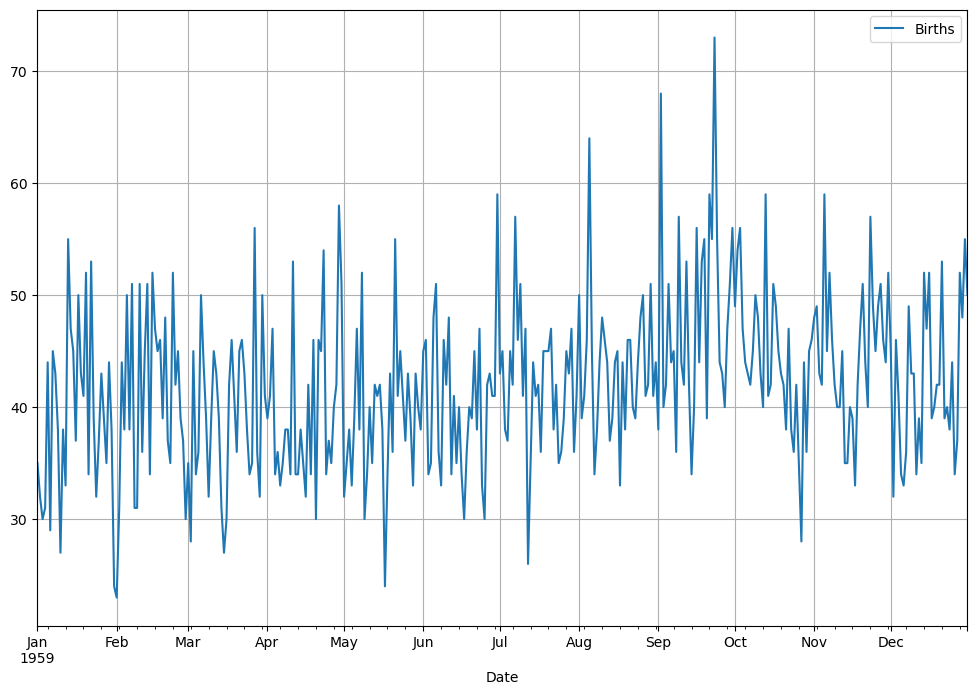

In [10]:
rcParams['figure.figsize']= 12,8
df.plot()
plt.grid()

# Check the basic measures of Descriptive Statistics of the Data

In [11]:
round((df.describe(include='all').T),3)

,count,mean,std,min,25%,50%,75%,max
Births,365.0,41.981,7.348,23.0,37.0,42.0,46.0,73.0


# Split the data into Train and Test set and plot the Training and Test data. [30% of the most recent data should be in the Test]

In [12]:
Train = df[0:int(len(df)*0.70)]
Test = df [int(len(df)*0.70):]

In [13]:
print('The shape of original dataset is', df.shape)
print ('The shape of 70% Train data of dataset is', Train.shape)
print('The shape of 30% most recent Test data of the dataset is',Test.shape)

The shape of original dataset is (365, 1)
The shape of 70% Train data of dataset is (255, 1)
The shape of 30% most recent Test data of the dataset is (110, 1)


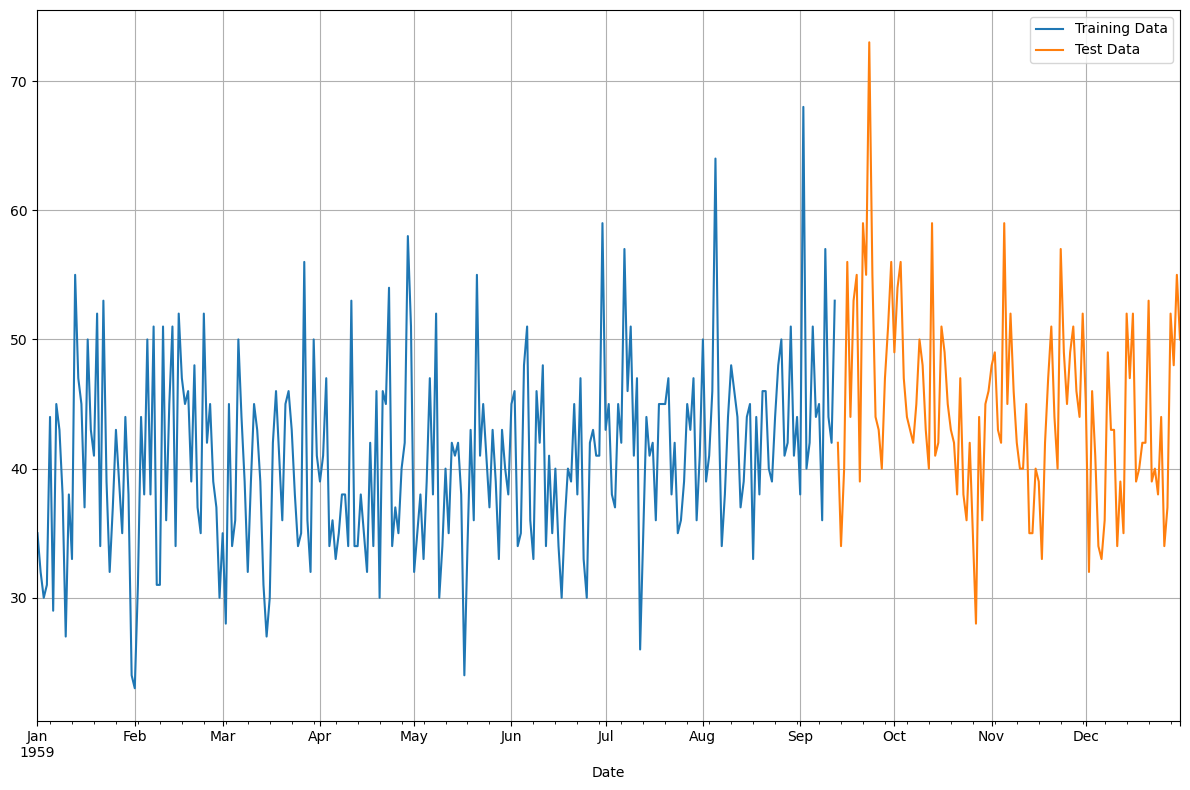

In [14]:
Train['Births'].plot()
Test['Births'].plot()
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.tight_layout()

Note : It is difficult to predict the future observations if such an instance has not happened in the past. From our train-test split we are predicting likewise behaviour as compared to the past years. 

# Building different Models and Comparing Accuracy Metrics

# 1. Linear Regresssion

# For this particular linear regression, we are going to regress the 'Births' variable against the order of the occurence. For this we need to modify our training data before fitting into a linear regression.

In [15]:
print(df.shape)
print(Train.shape)
print(Test.shape)

(365, 1)
(255, 1)
(110, 1)


In [16]:
Train_time = [i+1 for i in range(len(Train))]
Test_time =[i+256 for i in range(len(Test))]

In [17]:
print('Training Time Instance','\n',Train_time)
print('Test Time Instance','\n',Test_time)

Training Time Instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 21

Here, we have successfully generated the numerical time instance order into both training and test data. Now we will add these values into our training and test set

In [18]:
# Lets take the backup of our training and test data
LinearRegression_Train = Train.copy()
LinearRegression_Test = Test.copy()

In [19]:
# Create new column called 'Time' 
LinearRegression_Train['Time']= Train_time
LinearRegression_Test['Time']= Test_time

In [20]:
print('Linear Regression Train','\n',LinearRegression_Train.head())
print('Linear Regression Test','\n',LinearRegression_Test.head())

Linear Regression Train 
             Births  Time
Date                    
1959-01-01      35     1
1959-01-02      32     2
1959-01-03      30     3
1959-01-04      31     4
1959-01-05      44     5
Linear Regression Test 
             Births  Time
Date                    
1959-09-13      42   256
1959-09-14      34   257
1959-09-15      40   258
1959-09-16      56   259
1959-09-17      44   260


 Now our training and test data has been modified, let us go ahead use LinearRegression to build the model on the training data and test the model on test data

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr=LinearRegression()


In [23]:
lr.fit(LinearRegression_Train[['Time']],LinearRegression_Train['Births'])

LinearRegression()

In [24]:
# Prediction of Train
Train_predictions_model1 = lr.predict(LinearRegression_Train[['Time']])
LinearRegression_Train['ReggOnTime'] = Train_predictions_model1

In [25]:
# Prediction on Test
Test_predictions_model1 = lr.predict(LinearRegression_Test[['Time']])
LinearRegression_Test['ReggOnTime'] = Test_predictions_model1

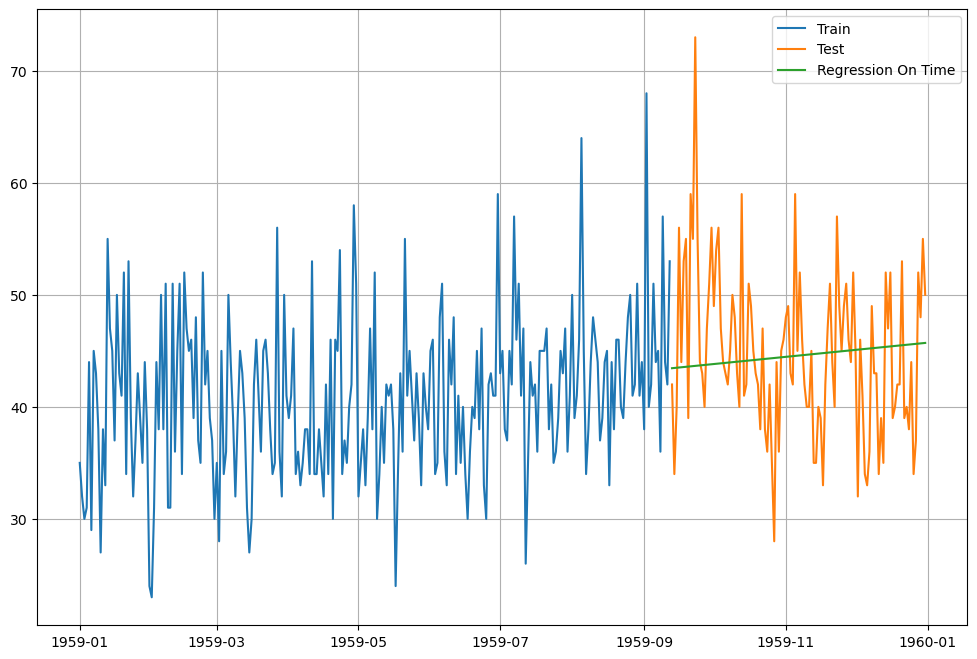

In [26]:
plt.plot(Train['Births'],label='Train')
plt.plot(Test['Births'],label='Test')
plt.plot(LinearRegression_Test['ReggOnTime'],label='Regression On Time')
plt.legend(loc='best')
plt.grid();

# Defining the Functions to calculating the Accuracy Metrics

In [27]:
from sklearn import metrics

# Model Evaluation

In [28]:
# We will compare the actual test data and the predicted test data
rmse_model1_test = metrics.mean_squared_error(Test['Births'],Test_predictions_model1,squared=False)
print(round((rmse_model1_test),3))

7.392


In [29]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index = ['Regression on Time'])
resultsDf

,Test RMSE
Regression on Time,7.391597


# Model 2 : Naive Model

### For this particular Naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tommorrow is tommorrow and since the prediction of tomorrow is same as today, therefore the prediction for day afte tomorrow is also today

In [30]:
Naivemodel_train = Train.copy()
Naivemodel_test = Test.copy()

In [31]:
# Lets check the last value of the dataset
Naivemodel_train.tail()

,Births
Date,
1959-09-08,36
1959-09-09,57
1959-09-10,44
1959-09-11,42
1959-09-12,53


In [32]:
Naivemodel_test['Naive'] = 53 #Here assume the last value of train to be the forecast
Naivemodel_test.head()

,Births,Naive
Date,,
1959-09-13,42,53
1959-09-14,34,53
1959-09-15,40,53
1959-09-16,56,53
1959-09-17,44,53


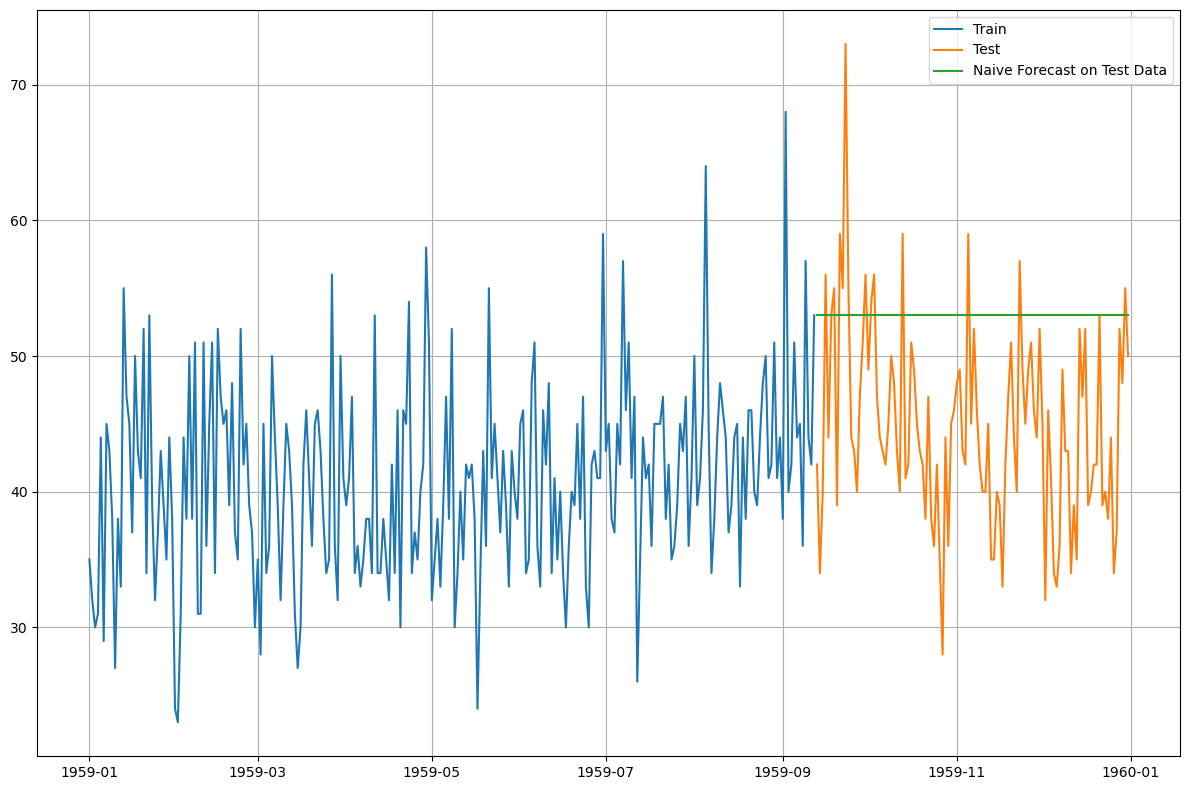

In [34]:
plt.plot(Naivemodel_train['Births'],label='Train')
plt.plot(Test['Births'],label='Test')

plt.plot(Naivemodel_test['Naive'],label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.tight_layout()
plt.grid()

# Model Evaluation

In [36]:
# We will compare the actual test data and the predicted test data
rmse_model2_test = metrics.mean_squared_error(Test['Births'],Naivemodel_test['Naive'],squared=False)
rmse_model2_test

10.9842862970038

In [40]:
resultsDf2 = pd.DataFrame({'Test RMSE':[rmse_model2_test]},index=['Naive Model'])
resultsDf2

,Test RMSE
Naive Model,10.984286


In [61]:
resultDf = pd.concat([resultsDf,resultsDf2])

In [62]:
resultDf

,Test RMSE
Regression on Time,7.391597
Naive Model,10.984286
Naive Model,10.984286
Naive Model,10.984286
Naive Model,10.984286
Naive Model,10.984286


In [81]:
resultDf.drop_duplicates(inplace=True)

In [82]:
resultDf

,Test RMSE
Regression on Time,7.391597
Naive Model,10.984286


# Method 3 : Simple Average

### For this particular Simple Average method, we will forecast by using the average of all the training values.

In [83]:
Simpleaverage_train = Train.copy()
Simpleaverage_test = Test.copy()

In [94]:
Simpleaverage_test['Mean Forecast'] = round((Simpleaverage_train['Births'].mean()),3)

In [95]:
Simpleaverage_test.head()

,Births,Mean Forecast
Date,,
1959-09-13,42,40.804
1959-09-14,34,40.804
1959-09-15,40,40.804
1959-09-16,56,40.804
1959-09-17,44,40.804


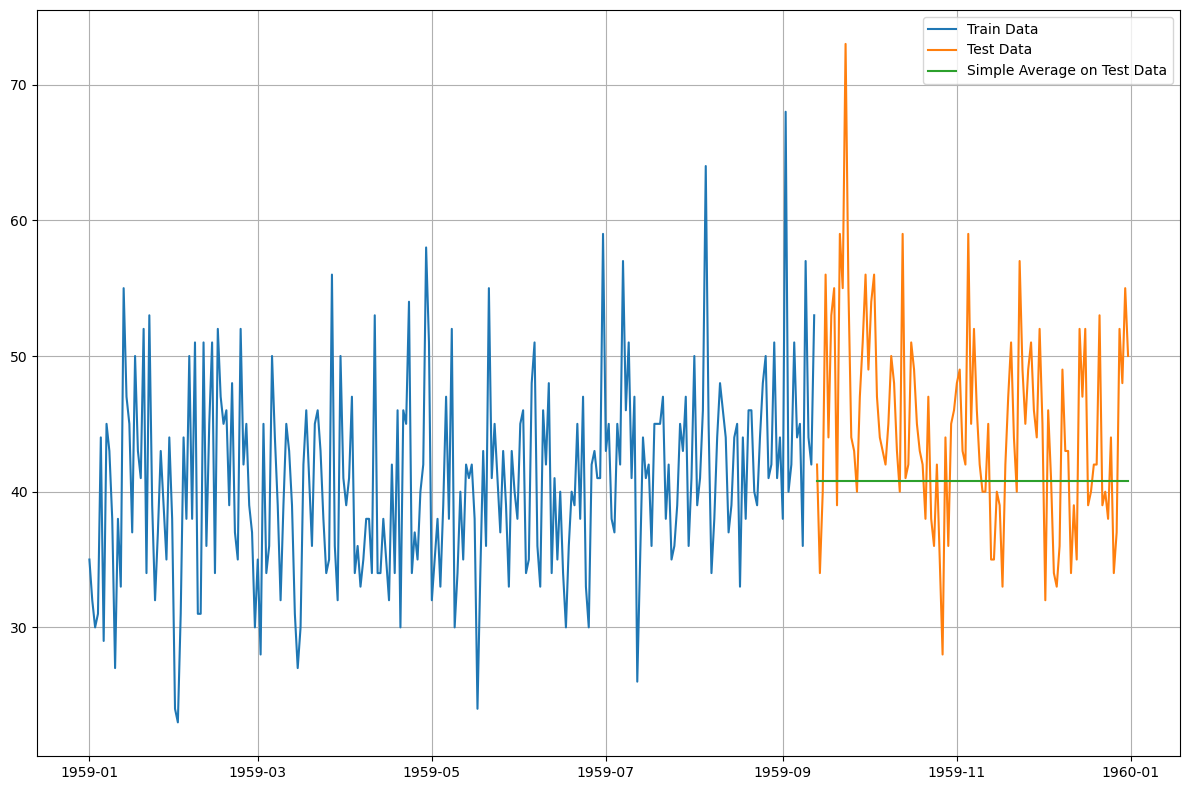

In [97]:
plt.plot(Simpleaverage_train['Births'], label = 'Train Data')
plt.plot(Simpleaverage_test['Births'],label = 'Test Data')

plt.plot(Simpleaverage_test['Mean Forecast'],label = 'Simple Average on Test Data')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()

# Model Evaluation

In [98]:
rmse_model3_test = metrics.mean_squared_error(Simpleaverage_test['Births'],Simpleaverage_test['Mean Forecast'],squared=False)
rmse_model3_test

8.195432075802403

In [115]:
resultsDf3 = pd.DataFrame({'Test RMSE':[rmse_model3_test]},index=['Simple Average'])
resultsDf3

,Test RMSE
Simple Average,8.195432


In [116]:
Final_Result = pd.concat([resultsDf,resultsDf2,resultsDf3])

In [117]:
Final_Result

,Test RMSE
Regression on Time,7.391597
Naive Model,10.984286
Naive Model,10.984286
Naive Model,10.984286
Naive Model,10.984286
Naive Model,10.984286
Simple Average,8.195432


In [118]:
Final_Result =Final_Result.drop_duplicates()

In [119]:
Final_Result

,Test RMSE
Regression on Time,7.391597
Naive Model,10.984286
Simple Average,8.195432


# Method 4 : Moving Averages

### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here

### For moving Average, we are going to average the entire data

In [120]:
MovingAverage = df.copy()
MovingAverage.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


## Trailing Moving Averages

In [125]:
MovingAverage['Trailing 2'] = MovingAverage['Births'].rolling(2).mean()
MovingAverage['Trailing 4'] = MovingAverage['Births'].rolling(4).mean()
MovingAverage['Trailing 6'] = MovingAverage['Births'].rolling(6).mean()
MovingAverage['Trailing 9'] = MovingAverage['Births'].rolling(9).mean()

MovingAverage.head()

,Births,Trailing 2,Trailing 4,Trailing 6,Trailing 9
Date,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN
1959-01-02,32,33.5,NaN,NaN,NaN
1959-01-03,30,31.0,NaN,NaN,NaN
1959-01-04,31,30.5,32.00,NaN,NaN
1959-01-05,44,37.5,34.25,NaN,NaN


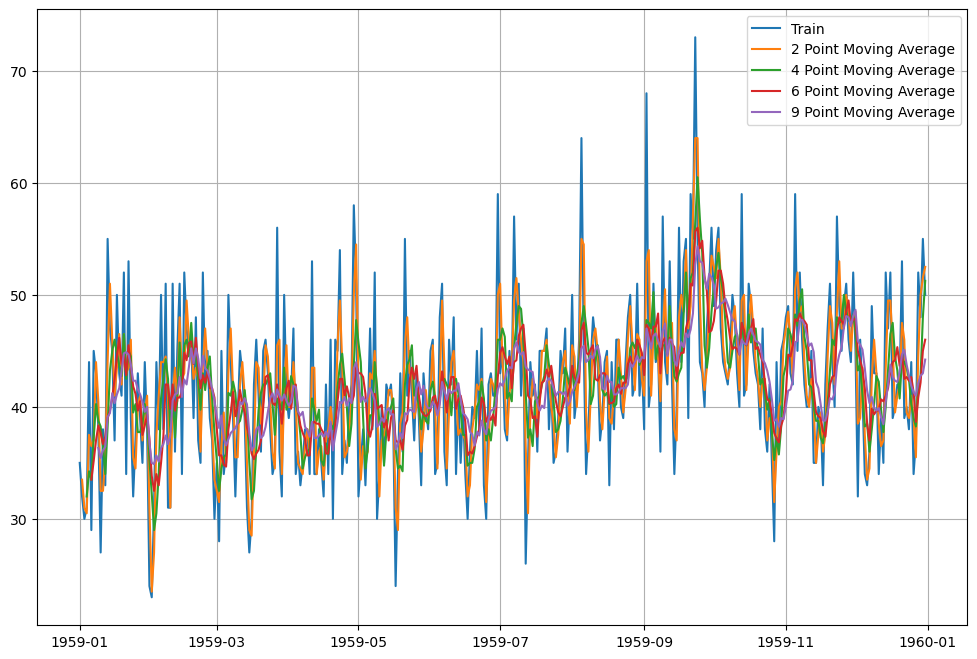

In [127]:
# Plotting on the whole data
plt.plot(MovingAverage['Births'],label='Train')
plt.plot(MovingAverage['Trailing 2'],label = '2 Point Moving Average')
plt.plot(MovingAverage['Trailing 4'],label = '4 Point Moving Average')
plt.plot(MovingAverage['Trailing 6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing 9'],label = '9 Point Moving Average')

plt.legend(loc='best')
plt.grid()


Let us split the data into train and test and plot the Time Series. The window of the Moving Average is need to be carefully selected as too big window will result in not having any test set as the whole series might get averaged over

In [128]:
# Creating Train and Test Set wiht 70:30 ratio
trailing_movingaverage_train = MovingAverage[0:int(len(MovingAverage)*0.70)] 
trailing_movingaverage_test = MovingAverage[int(len(MovingAverage)*0.70):]

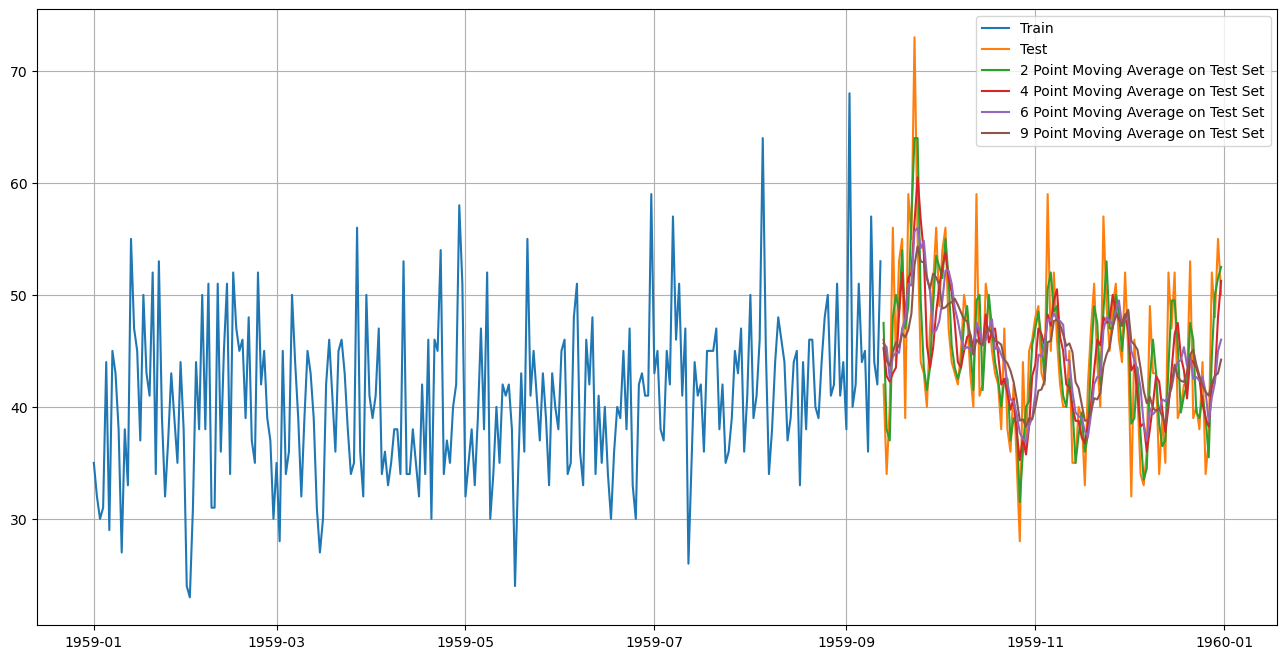

In [149]:
## Ploting the both on training and test set
plt.figure(figsize=(16,8))
plt.plot(trailing_movingaverage_train['Births'],label='Train')
plt.plot(trailing_movingaverage_test['Births'],label='Test')

plt.plot(trailing_movingaverage_test['Trailing 2'],label = '2 Point Moving Average on Test Set')
plt.plot(trailing_movingaverage_test['Trailing 4'],label = '4 Point Moving Average on Test Set')
plt.plot(trailing_movingaverage_test['Trailing 6'],label = '6 Point Moving Average on Test Set')
plt.plot(trailing_movingaverage_test['Trailing 9'],label = '9 Point Moving Average on Test Set')

plt.legend(loc='best')
plt.grid()

# Model Evaluation

### Done only on Test Data

In [150]:
# Test Data >> RMSE >> 2 Point Trailing Moving Average
rmse_model4_test_2 = metrics.mean_squared_error(Test['Births'],trailing_movingaverage_test['Trailing 2'],squared=False)
print('For 2 point Moving Average Model forecast on the Training Data',round((rmse_model4_test_2),2))

rmse_model4_test_4 = metrics.mean_squared_error(Test['Births'],trailing_movingaverage_test['Trailing 4'],squared=False)
print('For 4 point Moving Average Model forecast on the Taining Data',round((rmse_model4_test_4),2))

rmse_model4_test_6 = metrics.mean_squared_error(Test['Births'],trailing_movingaverage_test['Trailing 6'],squared=False)
print('For 6 point Moving Average Model forecast on the Training Data',round((rmse_model4_test_6),2))

rmse_model4_test_9 = metrics.mean_squared_error(Test['Births'],trailing_movingaverage_test['Trailing 9'],squared=False)
print('for 9 point Moving Average Model forecast on the Training Data',round((rmse_model4_test_9),2))

For 2 point Moving Average Model forecast on the Training Data 4.16
For 4 point Moving Average Model forecast on the Taining Data 5.53
For 6 point Moving Average Model forecast on the Training Data 6.11
for 9 point Moving Average Model forecast on the Training Data 6.5


In [151]:
resultsDf4 = pd.DataFrame({'Test RMSE' : [rmse_model4_test_2,rmse_model4_test_4,rmse_model4_test_6,rmse_model4_test_9]},index=['2 Point Trailing Moving Average','4 Point Trailing Moving Average','6 Point Trailing Moving Average','9 Point Trailing Moving Average'])

In [152]:
 resultsDf4

,Test RMSE
2 Point Trailing Moving Average,4.157961
4 Point Trailing Moving Average,5.531470
6 Point Trailing Moving Average,6.109316
9 Point Trailing Moving Average,6.502145


In [153]:
Result = pd.concat([Final_Result,resultsDf4])

In [154]:
Result

,Test RMSE
Regression on Time,7.391597
Naive Model,10.984286
Simple Average,8.195432
2 Point Trailing Moving Average,4.157961
4 Point Trailing Moving Average,5.531470
6 Point Trailing Moving Average,6.109316
9 Point Trailing Moving Average,6.502145


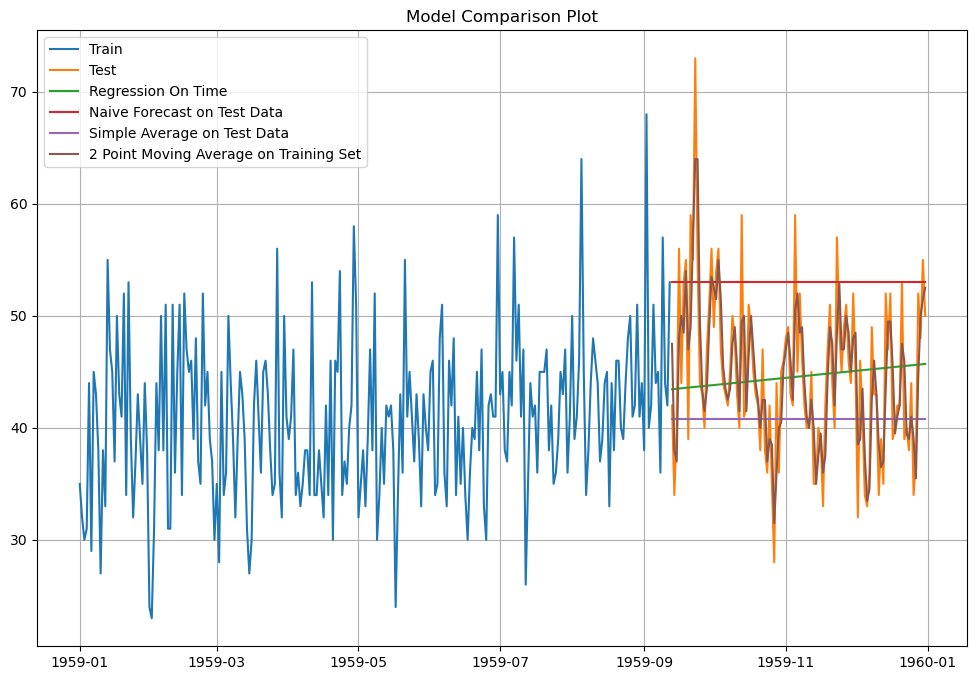

In [155]:
## Ploting on both Training and Test Data
plt.plot(Train['Births'],label='Train')
plt.plot(Test['Births'],label='Test')

plt.plot(LinearRegression_Test['ReggOnTime'],label='Regression On Time')
plt.plot(Naivemodel_test['Naive'],label='Naive Forecast on Test Data')
plt.plot(Simpleaverage_test['Mean Forecast'],label = 'Simple Average on Test Data')
plt.plot(trailing_movingaverage_test['Trailing 2'],label = '2 Point Moving Average on Training Set')

plt.legend(loc='best')
plt.title('Model Comparison Plot')
plt.grid()


# The End